<a href="https://colab.research.google.com/github/mrdbourke/pytorch-deep-learning/blob/main/extras/exercises/01_pytorch_workflow_exercises.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 01. PyTorch Workflow Exercise Template

The following is a template for the PyTorch workflow exercises.

It's only starter code and it's your job to fill in the blanks.

Because of the flexibility of PyTorch, there may be more than one way to answer the question.

Don't worry about trying to be *right* just try writing code that suffices the question.

You can see one form of [solutions on GitHub](https://github.com/mrdbourke/pytorch-deep-learning/tree/main/extras/solutions) (but try the exercises below yourself first!).

In [1]:
# Import necessary libraries
import torch
from torch import nn
import matplotlib.pyplot as plt

#torch.__version__
#!nvidia-smi

In [2]:
# Setup device-agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using device: {device}")

Using device: cuda


## 1. Create a straight line dataset using the linear regression formula (`weight * X + bias`).
  * Set `weight=0.3` and `bias=0.9` there should be at least 100 datapoints total.
  * Split the data into 80% training, 20% testing.
  * Plot the training and testing data so it becomes visual.

Your output of the below cell should look something like:
```
Number of X samples: 100
Number of y samples: 100
First 10 X & y samples:
X: tensor([0.0000, 0.0100, 0.0200, 0.0300, 0.0400, 0.0500, 0.0600, 0.0700, 0.0800,
        0.0900])
y: tensor([0.9000, 0.9030, 0.9060, 0.9090, 0.9120, 0.9150, 0.9180, 0.9210, 0.9240,
        0.9270])
```

Of course the numbers in `X` and `y` may be different but ideally they're created using the linear regression formula.

In [ ]:
# Create the data parameters
weight = 0.3
bias = 0.9

# Make X and y using linear regression feature

# X = features
# because in some ML parts 2D shape is expected, we unsqueeze X
start_x = 0
end_x = 1
step_x = 0.01
X = torch.arange(start_x, end_x, step_x).unsqueeze(dim=1)

# y = labels
y = weight * X + bias

print(f"Number of X samples: {len(X)}")
print(f"Number of y samples: {len(y)}")
print(f"First 10 X & y samples:\nX: {X[:10]}\ny: {y[:10]}")

Number of X samples: 100
Number of y samples: 100
First 10 X & y samples:
X: tensor([[0.0000],
        [0.0100],
        [0.0200],
        [0.0300],
        [0.0400],
        [0.0500],
        [0.0600],
        [0.0700],
        [0.0800],
        [0.0900]])
y: tensor([[0.9000],
        [0.9030],
        [0.9060],
        [0.9090],
        [0.9120],
        [0.9150],
        [0.9180],
        [0.9210],
        [0.9240],
        [0.9270]])


In [ ]:
# Split the data into training and testing
train_split = int(0.8*len(X))
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

print(f"Number of train X samples: {len(X_train)}")
print(f"Number of train y samples: {len(y_train)}")
print(f"Number of test X samples: {len(X_test)}")
print(f"Number of test y samples: {len(y_test)}")

Number of train X samples: 80
Number of train y samples: 80
Number of test X samples: 20
Number of test y samples: 20


In [ ]:
# function to visualize data
def plot_predictions(train_data=X_train,
                     train_labels=y_train,
                     test_data=X_test,
                     test_labels=y_test,
                     predictions=None):
  plt.figure(figsize=(10,7))

# plot training data in blue
  plt.scatter(train_data, train_labels, c="b", s=4, label="Training data")

# plot test data in green
  plt.scatter(test_data, test_labels, c="g", s=4, label="Testing data")

# checking if there are predictions
  if predictions is not None:
    plt.scatter(test_data, predictions, c="r", s=4, label="Predictions") # comparing model's predictions (in red) (from test phase) to actual labels

  plt.legend(prop={"size": 14})

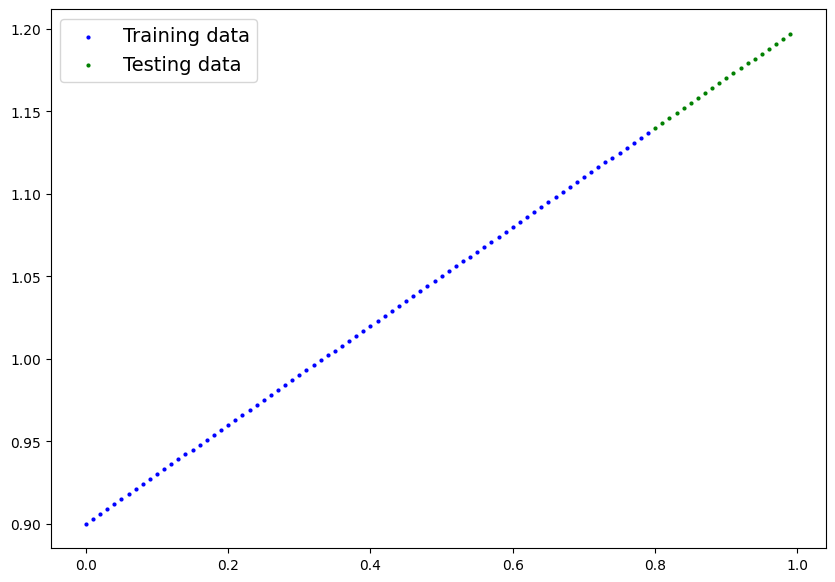

In [ ]:
plot_predictions()

## 2. Build a PyTorch model by subclassing `nn.Module`.
  * Inside should be a randomly initialized `nn.Parameter()` with `requires_grad=True`, one for `weights` and one for `bias`.
  * Implement the `forward()` method to compute the linear regression function you used to create the dataset in 1.
  * Once you've constructed the model, make an instance of it and check its `state_dict()`.
  * **Note:** If you'd like to use `nn.Linear()` instead of `nn.Parameter()` you can.

In [ ]:
# Create PyTorch linear regression model by subclassing nn.Module
class LinearRegressionModel(nn.Module):
  def __init__(self):
    super().__init__()
    self.weights = nn.Parameter(torch.randn(1,
                                            requires_grad=True))
    self.bias = nn.Parameter(torch.randn(1,
                                            requires_grad=True))

  def forward(self, x: torch.Tensor) -> torch.Tensor:
    return self.weights * x + self.bias

In [ ]:
# Instantiate the model and put it to the target device
model_0 = LinearRegressionModel()
model_0.state_dict()

OrderedDict([('weights', tensor([0.3119])), ('bias', tensor([0.6049]))])

In [ ]:
class LinearRegressionModelV2(nn.Module):
  def __init__(self):
    super().__init__()
    self.linear_layer = nn.Linear(in_features = 1, # we have 1 value of x as input (check print below)
                                  out_features = 1) # for 1 value of y as output (check print below)
  def forward(self, x: torch.Tensor) -> torch.Tensor:
    return self.linear_layer(x)

In [ ]:
X_train[:5], y_train[:5]

(tensor([[0.0000],
         [0.0100],
         [0.0200],
         [0.0300],
         [0.0400]]),
 tensor([[0.9000],
         [0.9030],
         [0.9060],
         [0.9090],
         [0.9120]]))

In [ ]:
# checking new model
torch.manual_seed(22)
model_1 = LinearRegressionModelV2()
model_1, model_1.state_dict()

# it creates a weight and a bias parameters automatically, as below
# i trained it and it had the same results as model_0, if you want you can swap 1 for 0 and test

(LinearRegressionModelV2(
   (linear_layer): Linear(in_features=1, out_features=1, bias=True)
 ),
 OrderedDict([('linear_layer.weight', tensor([[-0.2682]])),
              ('linear_layer.bias', tensor([0.4050]))]))

In [ ]:
# back to model_0. check the model_0 current device - it sends it to cuda if available
next(model_0.parameters()).device

device(type='cpu')

In [ ]:
# set model to use target device and check
model_0.to(device)
next(model_0.parameters()).device

device(type='cuda', index=0)

## 3. Create a loss function and optimizer using `nn.L1Loss()` and `torch.optim.SGD(params, lr)` respectively.
  * Set the learning rate of the optimizer to be 0.01 and the parameters to optimize should be the model parameters from the model you created in 2.
  * Write a training loop to perform the appropriate training steps for 300 epochs.
  * The training loop should test the model on the test dataset every 20 epochs.

In [ ]:
# Create the loss function and optimizer
lr = 0.01
params = model_0.parameters()

loss_fn = nn.L1Loss() # same as MAE
optimizer = torch.optim.SGD(params, lr)

In [ ]:
# Training loop
torch.manual_seed(22)

# Train model for 300 epochs
epochs = 600

# Send data to target device
X_train = X_train.to(device)
y_train = y_train.to(device)
X_test = X_test.to(device)
y_test = y_test.to(device)

for epoch in range(epochs):
  ### Training

  # Put model in train mode
  model_0.train()

  # 1. Forward pass
  y_pred = model_0(X_train)

  # 2. Calculate loss
  train_loss = loss_fn(y_pred, y_train)

  # 3. Zero gradients
  optimizer.zero_grad()

  # 4. Backpropagation
  train_loss.backward()

  # 5. Step the optimizer
  optimizer.step()

  ### Perform testing every 20 epochs
  if epoch % 20 == 0:

    # Put model in evaluation mode and setup inference context
    model_0.eval()
    with torch.inference_mode():

      # 1. Forward pass
      test_pred = model_0(X_test)

      # 2. Calculate test loss
      test_loss = loss_fn(test_pred, y_test)

      # Print out what's happening
      print(f"Epoch: {epoch} | Train loss: {train_loss:.3f} | Test loss: {test_loss:.3f}")

Epoch: 0 | Train loss: 0.290 | Test loss: 0.271
Epoch: 20 | Train loss: 0.059 | Test loss: 0.005
Epoch: 40 | Train loss: 0.017 | Test loss: 0.038
Epoch: 60 | Train loss: 0.010 | Test loss: 0.022
Epoch: 80 | Train loss: 0.003 | Test loss: 0.006
Epoch: 100 | Train loss: 0.008 | Test loss: 0.001
Epoch: 120 | Train loss: 0.008 | Test loss: 0.001
Epoch: 140 | Train loss: 0.008 | Test loss: 0.001
Epoch: 160 | Train loss: 0.008 | Test loss: 0.001
Epoch: 180 | Train loss: 0.008 | Test loss: 0.001
Epoch: 200 | Train loss: 0.008 | Test loss: 0.001
Epoch: 220 | Train loss: 0.008 | Test loss: 0.001
Epoch: 240 | Train loss: 0.008 | Test loss: 0.001
Epoch: 260 | Train loss: 0.008 | Test loss: 0.001
Epoch: 280 | Train loss: 0.008 | Test loss: 0.001
Epoch: 300 | Train loss: 0.008 | Test loss: 0.001
Epoch: 320 | Train loss: 0.008 | Test loss: 0.001
Epoch: 340 | Train loss: 0.008 | Test loss: 0.001
Epoch: 360 | Train loss: 0.008 | Test loss: 0.001
Epoch: 380 | Train loss: 0.008 | Test loss: 0.001
Epoch:

In [ ]:
# compare learned parameters with original weight and bias - they should be close!
print(model_0.state_dict())
print(weight, bias)

OrderedDict([('weights', tensor([0.3082], device='cuda:0')), ('bias', tensor([0.9052], device='cuda:0'))])
0.3 0.9


## 4. Make predictions with the trained model on the test data.
  * Visualize these predictions against the original training and testing data (**note:** you may need to make sure the predictions are *not* on the GPU if you want to use non-CUDA-enabled libraries such as matplotlib to plot).

In [ ]:
# Make predictions with the model
torch.manual_seed(22)

model_0.eval()
with torch.inference_mode():
  y_preds = model_0(X_test)

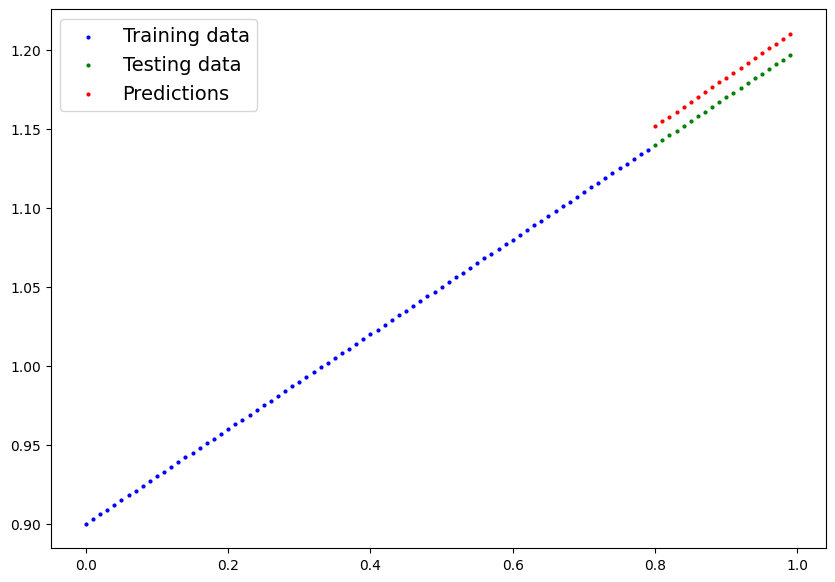

In [ ]:
# Plot the predictions (these may need to be on a specific device)
plot_predictions(predictions=y_preds.cpu()) # we have to send it to cpu

## 5. Save your trained model's `state_dict()` to file.
  * Create a new instance of your model class you made in 2. and load in the `state_dict()` you just saved to it.
  * Perform predictions on your test data with the loaded model and confirm they match the original model predictions from 4.

In [ ]:
from pathlib import Path

# 1. Create models directory
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, exist_ok=True)

# 2. Create model save path
MODEL_NAME = "01_model.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

# 3. Save the model state dict
print(f"Saving model to: {MODEL_SAVE_PATH}")
torch.save(obj=model_0.state_dict(),
           f = MODEL_SAVE_PATH)

Saving model to: models/01_model.pth


In [ ]:
# Create new instance of model and load saved state dict (make sure to put it on the target device)
model_0_reloaded = LinearRegressionModel()
model_0_reloaded.load_state_dict(torch.load(f=MODEL_SAVE_PATH))

<All keys matched successfully>

In [ ]:
# send loaded model to device
model_0_reloaded.to(device)

LinearRegressionModel()

In [ ]:
# Make predictions with loaded model and compare them to the previous
torch.manual_seed(22)
with torch.inference_mode():
  y_preds_reloaded = model_0_reloaded(X_test)
y_preds_reloaded

tensor([[1.1518],
        [1.1548],
        [1.1579],
        [1.1610],
        [1.1641],
        [1.1672],
        [1.1702],
        [1.1733],
        [1.1764],
        [1.1795],
        [1.1826],
        [1.1857],
        [1.1887],
        [1.1918],
        [1.1949],
        [1.1980],
        [1.2011],
        [1.2041],
        [1.2072],
        [1.2103]], device='cuda:0')

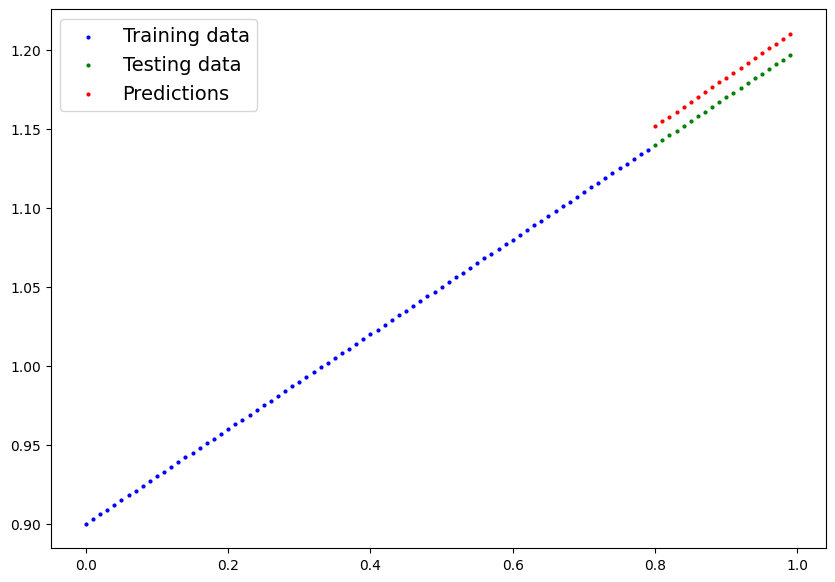

In [ ]:
plot_predictions(predictions=y_preds_reloaded.cpu()) # BEWARE! cpu detail again

In [ ]:
# checking if predictions from original and loaded are the same
y_preds == y_preds_reloaded

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]], device='cuda:0')